<h2> Spam Classification : Machine Learning </h2>
<img width = 500 height =500 src = 'spam.png'/>

##### This notebook is about how Emails can be classified as Spam or Not Spam. The model uses a machine learning model that of Multinomial Naives which is a probabilistic classification algorithm based on Bayes' Theorem, primarily used for discrete data (like text classification, document categorization, or categorical features etc).

## Import Libraries 

In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the data 

In [57]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.shape

(5572, 2)

## Data Preprocessing 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [61]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [62]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [63]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

## Model Preprocessing

In [65]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test) 

In [67]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred =model.predict(X_test_count)
y_pred[:10]
y_test[:10]


3245    ham
944     ham
1044    ham
2484    ham
812     ham
2973    ham
2991    ham
2942    ham
230     ham
1181    ham
Name: Category, dtype: object

In [69]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9919282511210762

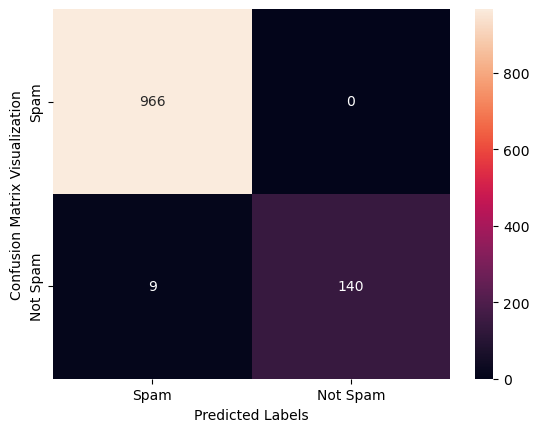

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot = True, 
            fmt = 'd', 
            xticklabels = ['Spam','Not Spam'], 
            yticklabels =['Spam', 'Not Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Confusion Matrix Visualization')
plt.show()

## Alternatively Using Sklearn Pipeline

In [89]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('nb_classifier',MultinomialNB())
    ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



#### It is found that the model can be 99% accurate in predicting whether Emails are spam or not spam based on Multinomial Naives Bayes.

In [109]:
!git clone https://github.com/Sudecon5/Spam-Classifier-/.git
!cp notebook.ipynb Spam-Classifier/
!cd repo_name && git add . && git commit -m "Added notebook" && git push

Cloning into 'repo_name'...
remote: Repository not found.
fatal: repository 'https://github.com/your_username/repo_name.git/' not found
cp: directory repo_name does not exist
zsh:cd:1: no such file or directory: repo_name
